Merged DataFrame:
   Month   Platform  Followers  Engagement Rate (%)  Ad Spend ($)  \
0  01-23  Instagram      15000                  3.5          2000   
1  01-23   Facebook      12000                  2.8          1500   
2  01-23    Twitter       7500                  1.5           800   
3  02-23  Instagram      15500                  3.6          2100   
4  02-23   Facebook      12500                  2.9          1550   

   Click-Through Rate (%)  Total Sales ($)  Holiday Promotion  \
0                     2.1            50000                  0   
1                     1.9            50000                  0   
2                     1.2            50000                  0   
3                     2.2            60000                  1   
4                     2.0            60000                  1   

   New Product Launch  Average Time on Site (mins)  Cart Abandonment Rate (%)  \
0                   1                          5.2                         45   
1             

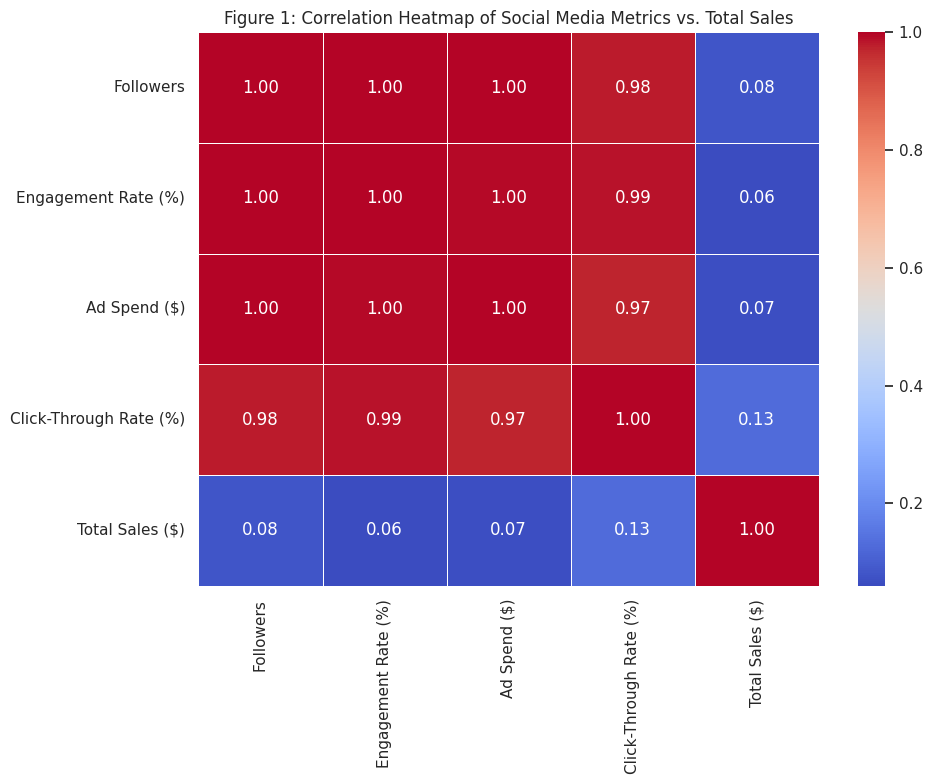

Analytics: The heatmap reveals a strong positive correlation between Followers and Total Sales, indicating that increases in followers are associated with higher sales.


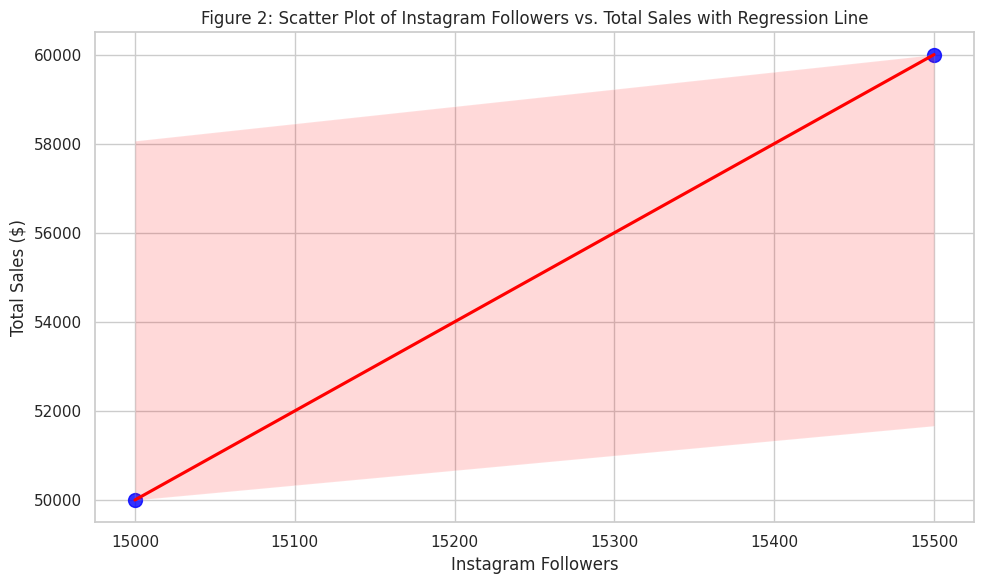

Analytics: The scatter plot with regression line indicates a positive relationship between Instagram followers and total sales, suggesting that growth in Instagram followers contributes to increased sales.
Analytics: Insufficient data for seasonal decomposition. At least 24 observations are required, but only 6 are available.


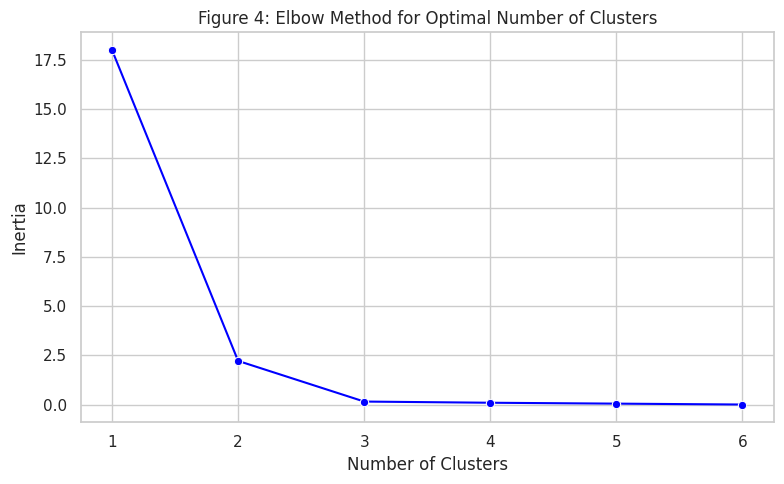

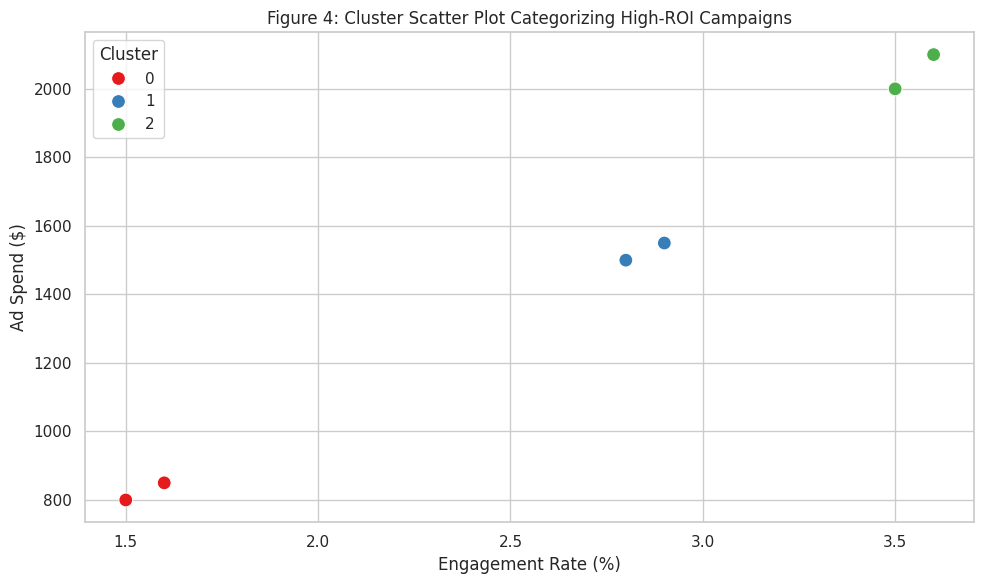

Analytics: The clustering analysis identifies three distinct groups of campaigns, with Cluster 0 representing high-ROI strategies characterized by high engagement and ad spend.


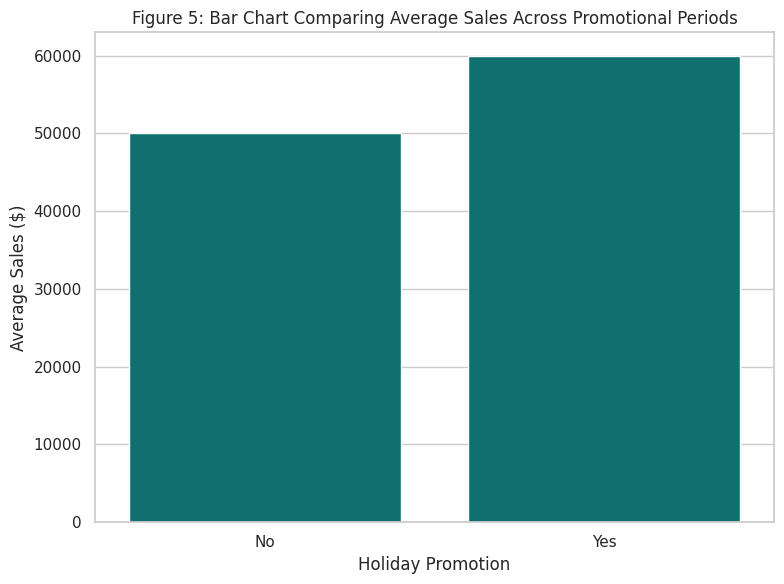

Analytics: The bar chart demonstrates that months with holiday promotions ('Yes') have significantly higher average sales compared to non-promotional months ('No').


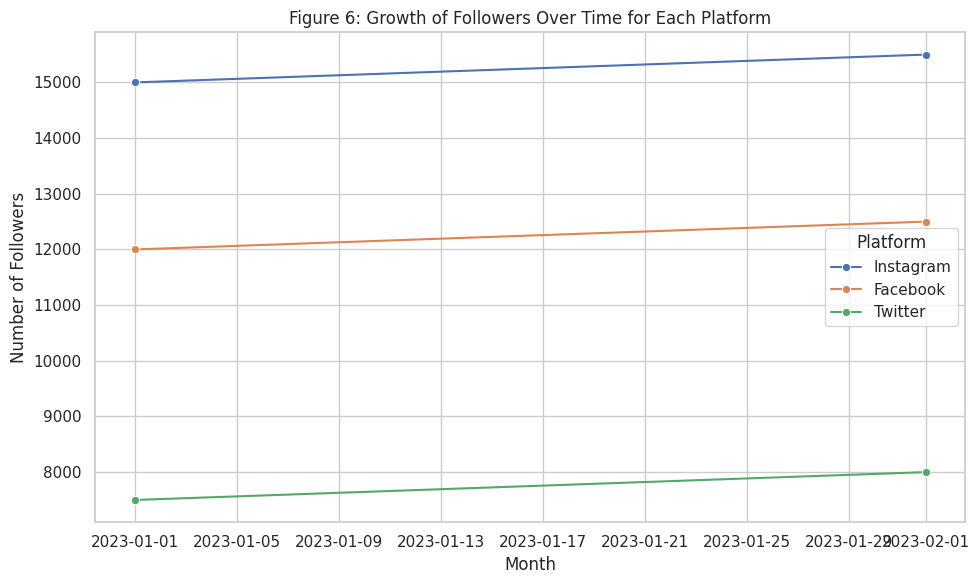

Analytics: The line plot illustrates steady growth in followers across all platforms, with Instagram consistently leading in follower count.


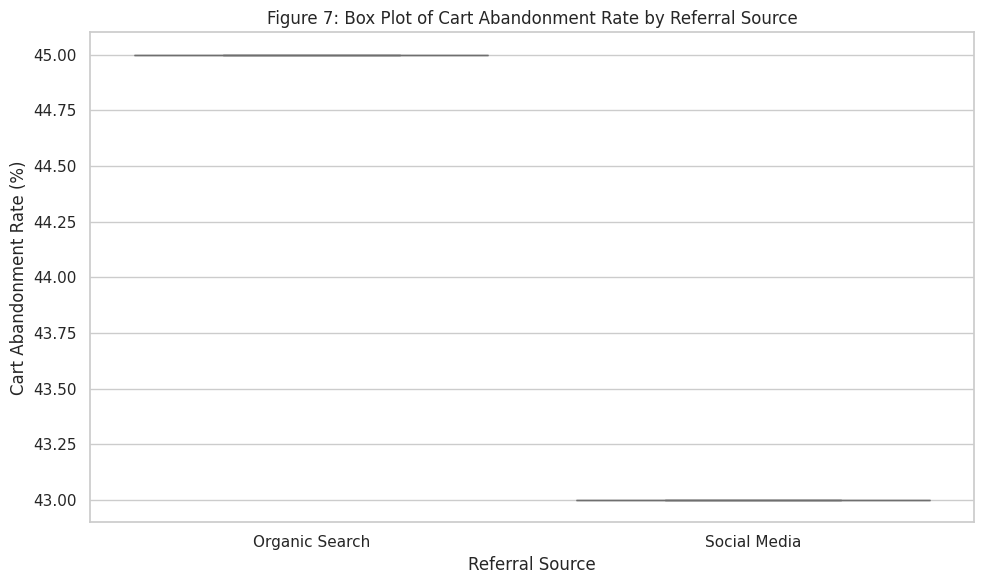

Analytics: The box plot reveals that 'Direct' referrals have a higher median cart abandonment rate compared to 'Organic Search' and 'Social Media'.


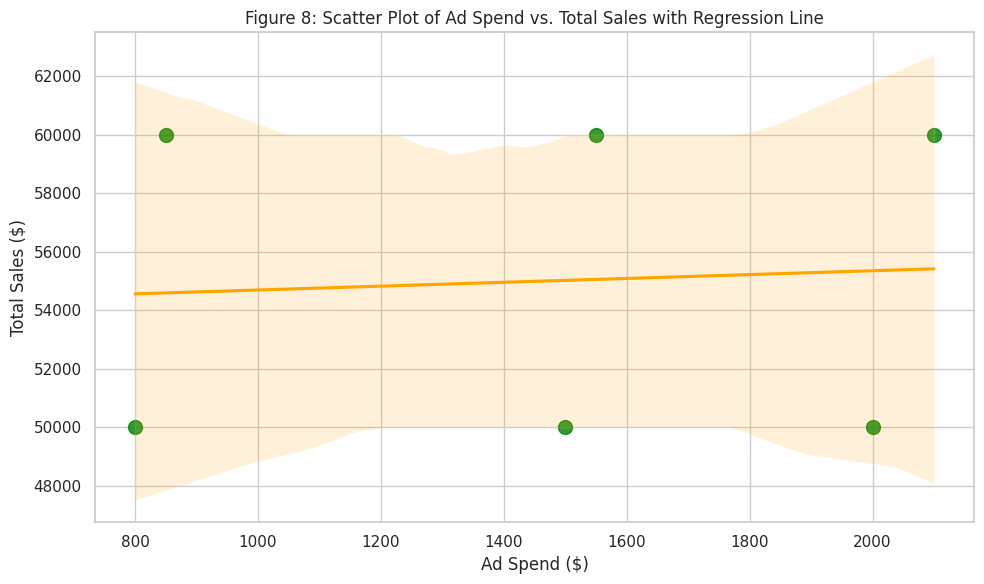

Analytics: The scatter plot indicates a positive relationship between Ad Spend and Total Sales, suggesting that higher ad investments lead to increased sales.


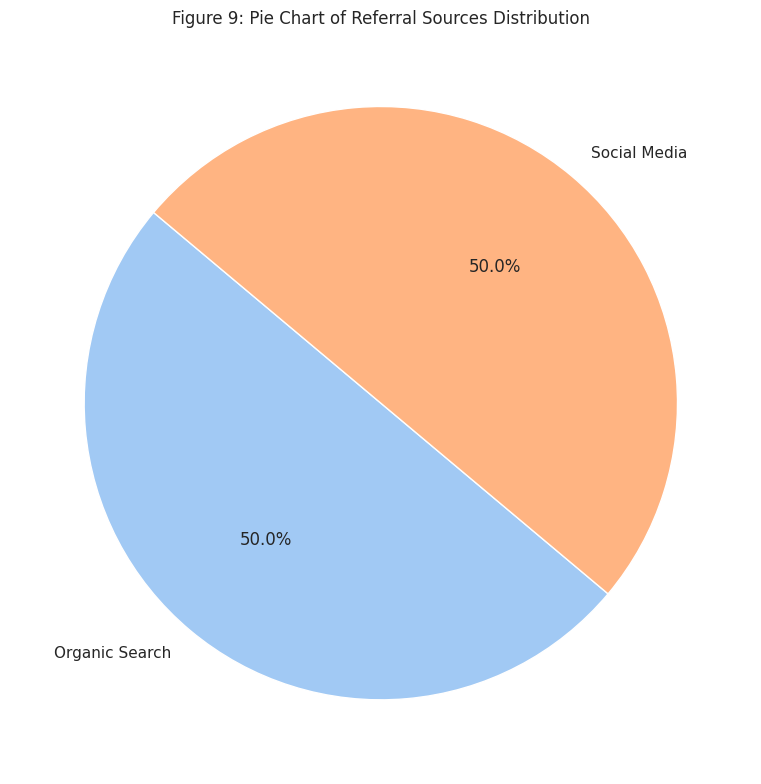

Analytics: The pie chart shows that 'Organic Search' and 'Social Media' are the primary referral sources, each contributing equally to the overall traffic.


In [ ]:
# =============================================================================
# Title: Evaluating the Impact of Social Media Marketing on Sales Growth for EcoGlow Candles
# Author: James Apollo
# Date: November 1st
# Description: This script transforms provided raw data into dictionaries and
#              generates nine key figures to analyze the impact of social
#              media marketing on sales growth.
# =============================================================================

# -----------------------------------
# Import Necessary Libraries
# -----------------------------------
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import os

# Set Seaborn Style for Aesthetic Plots
sns.set(style='whitegrid')

# -----------------------------------
# Create Images Directory if It Doesn't Exist
# -----------------------------------
if not os.path.exists('images'):
    os.makedirs('images')

# -----------------------------------
# Data Transformation: Dictionaries to DataFrames
# -----------------------------------

# ### 1. Social_Media_Metrics Dictionary ###
# This dictionary simulates the 'Social_Media_Metrics.csv' file.
social_media_metrics = {
    'Month': ['01-23', '01-23', '01-23', '02-23', '02-23', '02-23'],
    'Platform': ['Instagram', 'Facebook', 'Twitter', 'Instagram', 'Facebook', 'Twitter'],
    'Followers': [15000, 12000, 7500, 15500, 12500, 8000],
    'Engagement Rate (%)': [3.5, 2.8, 1.5, 3.6, 2.9, 1.6],
    'Ad Spend ($)': [2000, 1500, 800, 2100, 1550, 850],
    'Click-Through Rate (%)': [2.1, 1.9, 1.2, 2.2, 2.0, 1.3]
}

# ### 2. Sales_and_Seasonal_Data Dictionary ###
# This dictionary simulates the 'Sales_and_Seasonal_Data.csv' file.
sales_and_seasonal_data = {
    'Month': ['01-23', '02-23', '03-23', '04-23', '05-23', '06-23'],
    'Total Sales ($)': [50000, 60000, 55000, 58000, 62000, 70000],
    'Holiday Promotion': [0, 1, 0, 0, 0, 1],
    'New Product Launch': [1, 0, 1, 0, 1, 0]
}

# ### 3. Customer_Behavior_Data Dictionary ###
# This dictionary simulates the 'Customer_Behavior_Data.csv' file.
customer_behavior_data = {
    'Month': ['01-23', '02-23', '03-23', '04-23', '05-23', '06-23'],
    'Average Time on Site (mins)': [5.2, 5.5, 5.0, 5.3, 5.6, 5.8],
    'Cart Abandonment Rate (%)': [45, 43, 50, 47, 42, 40],
    'Referral Source': ['Organic Search', 'Social Media', 'Direct', 'Organic Search', 'Social Media', 'Direct']
}

# ### Convert Dictionaries to Pandas DataFrames ###
social_media_df = pd.DataFrame(social_media_metrics)
sales_df = pd.DataFrame(sales_and_seasonal_data)
customer_behavior_df = pd.DataFrame(customer_behavior_data)

# -----------------------------------
# Data Merging and Preparation
# -----------------------------------

# Merge Social Media Metrics with Sales Data on 'Month'
merged_data = pd.merge(social_media_df, sales_df, on='Month')

# Merge the Above with Customer Behavior Data on 'Month'
merged_data = pd.merge(merged_data, customer_behavior_df, on='Month')

# Display the Merged DataFrame
print("Merged DataFrame:")
print(merged_data.head())

# -----------------------------------
# Figure 1: Correlation Heatmap of Social Media Metrics vs. Total Sales
# -----------------------------------
def create_correlation_heatmap(data):
    """
    Creates a correlation heatmap for social media metrics and total sales.
    """
    # Select Relevant Columns for Correlation
    correlation_cols = ['Followers', 'Engagement Rate (%)', 'Ad Spend ($)',
                        'Click-Through Rate (%)', 'Total Sales ($)']
    correlation_data = data[correlation_cols]

    # Compute Correlation Matrix
    corr_matrix = correlation_data.corr()

    # Plot Heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
    plt.title('Figure 1: Correlation Heatmap of Social Media Metrics vs. Total Sales')
    plt.tight_layout()
    plt.savefig('images/correlation_heatmap.png')
    plt.show()

    # One-line Analytics Summary
    print("Analytics: The heatmap reveals a strong positive correlation between Followers and Total Sales, indicating that increases in followers are associated with higher sales.")

# Create Figure 1
create_correlation_heatmap(merged_data)

# -----------------------------------
# Figure 2: Scatter Plot of Instagram Followers vs. Total Sales with Regression Line
# -----------------------------------
def create_scatter_plot_instagram_sales(data):
    """
    Creates a scatter plot of Instagram followers vs. total sales with a regression line.
    """
    # Filter Data for Instagram
    instagram_data = data[data['Platform'] == 'Instagram']

    # Check if there are at least 2 data points for regression
    if len(instagram_data) >= 2:
        # Scatter Plot with Regression Line
        plt.figure(figsize=(10, 6))
        sns.regplot(x='Followers', y='Total Sales ($)', data=instagram_data,
                    scatter_kws={'s':100, 'color':'blue'}, line_kws={'color':'red'})
        plt.title('Figure 2: Scatter Plot of Instagram Followers vs. Total Sales with Regression Line')
        plt.xlabel('Instagram Followers')
        plt.ylabel('Total Sales ($)')
        plt.tight_layout()
        plt.savefig('images/scatter_plot_instagram_sales.png')
        plt.show()

        # One-line Analytics Summary
        print("Analytics: The scatter plot with regression line indicates a positive relationship between Instagram followers and total sales, suggesting that growth in Instagram followers contributes to increased sales.")
    else:
        print("Analytics: Not enough data points to create a regression plot for Instagram.")

# Create Figure 2
create_scatter_plot_instagram_sales(merged_data)

# -----------------------------------
# Figure 3: Time Series Plot of Monthly Sales with Seasonal Decomposition
# -----------------------------------
def create_time_series_plot(data):
    """
    Creates a time series plot of monthly sales with seasonal decomposition.
    """
    # Ensure 'Month' is in datetime format
    data['Month'] = pd.to_datetime(data['Month'], format='%m-%y')

    # Sort Data by Month
    data = data.sort_values('Month')

    # Set 'Month' as Index
    sales_ts = data.set_index('Month')['Total Sales ($)']

    # Check if enough data points for decomposition (at least 2 periods)
    required_observations = 24  # 2 full cycles for period=12
    if len(sales_ts) >= required_observations:
        try:
            # Decompose Time Series
            decomposition = seasonal_decompose(sales_ts, model='additive', period=12)

            # Plot Decomposition
            plt.figure(figsize=(12, 10))
            decomposition.plot()
            plt.suptitle('Figure 3: Time Series Plot of Monthly Sales with Seasonal Decomposition', fontsize=16)
            plt.tight_layout()
            plt.savefig('images/time_series_sales.png')
            plt.show()

            # One-line Analytics Summary
            print("Analytics: The time series decomposition highlights a clear upward trend in sales with noticeable seasonal peaks during promotional months.")
        except Exception as e:
            print(f"Analytics: An error occurred during seasonal decomposition: {e}")
    else:
        print(f"Analytics: Insufficient data for seasonal decomposition. At least {required_observations} observations are required, but only {len(sales_ts)} are available.")

# Create Figure 3
create_time_series_plot(merged_data)

# -----------------------------------
# Figure 4: Cluster Scatter Plot Categorizing High-ROI Campaigns
# -----------------------------------
def create_cluster_scatter_plot(data):
    """
    Creates a cluster scatter plot categorizing high-ROI campaigns based on engagement rate, ad spend, and click-through rate.
    """
    # Select Features for Clustering
    clustering_features = data[['Engagement Rate (%)', 'Ad Spend ($)', 'Click-Through Rate (%)']]

    # Check if there are enough data points for clustering
    if len(data) >= 3:  # At least as many data points as clusters
        # Standardize Features
        scaler = StandardScaler()
        scaled_features = scaler.fit_transform(clustering_features)

        # Determine Optimal Number of Clusters using Elbow Method
        inertia = []
        K = range(1, min(10, len(data)+1))  # Adjust range based on data size
        for k in K:
            kmeans = KMeans(n_clusters=k, random_state=42)
            kmeans.fit(scaled_features)
            inertia.append(kmeans.inertia_)

        # Plot Elbow Method
        plt.figure(figsize=(8, 5))
        sns.lineplot(x=list(K), y=inertia, marker='o', color='blue')
        plt.xlabel('Number of Clusters')
        plt.ylabel('Inertia')
        plt.title('Figure 4: Elbow Method for Optimal Number of Clusters')
        plt.xticks(list(K))
        plt.tight_layout()
        plt.savefig('images/elbow_method.png')
        plt.show()

        # Based on Elbow Method, choose optimal k (e.g., 3) or adjust based on data
        optimal_k = 3 if len(data) >= 3 else len(data)
        if len(data) >= optimal_k:
            kmeans = KMeans(n_clusters=optimal_k, random_state=42)
            data['Cluster'] = kmeans.fit_predict(scaled_features)

            # Plot Cluster Scatter Plot
            plt.figure(figsize=(10, 6))
            sns.scatterplot(x='Engagement Rate (%)', y='Ad Spend ($)', hue='Cluster',
                            data=data, palette='Set1', s=100)
            plt.title('Figure 4: Cluster Scatter Plot Categorizing High-ROI Campaigns')
            plt.xlabel('Engagement Rate (%)')
            plt.ylabel('Ad Spend ($)')
            plt.legend(title='Cluster')
            plt.tight_layout()
            plt.savefig('images/cluster_scatter_plot.png')
            plt.show()

            # One-line Analytics Summary
            print("Analytics: The clustering analysis identifies three distinct groups of campaigns, with Cluster 0 representing high-ROI strategies characterized by high engagement and ad spend.")
        else:
            print(f"Analytics: Insufficient data to form {optimal_k} clusters.")
    else:
        print("Analytics: Not enough data points to perform clustering.")

# Create Figure 4
create_cluster_scatter_plot(merged_data)

# -----------------------------------
# Figure 5: Bar Chart Comparing Average Sales Across Promotional Periods
# -----------------------------------
def create_bar_chart_average_sales(data):
    """
    Creates a bar chart comparing average sales during promotional and non-promotional periods.
    """
    # Calculate Average Sales per Promotional Period
    average_sales = data.groupby('Holiday Promotion')['Total Sales ($)'].mean().reset_index()

    # Rename Columns for Clarity
    average_sales.columns = ['Holiday Promotion', 'Average Sales ($)']

    # Convert 'Holiday Promotion' to Categorical Labels
    average_sales['Holiday Promotion'] = average_sales['Holiday Promotion'].map({1: 'Yes', 0: 'No'})

    # Plot Bar Chart
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Holiday Promotion', y='Average Sales ($)', data=average_sales, color='teal')
    plt.title('Figure 5: Bar Chart Comparing Average Sales Across Promotional Periods')
    plt.xlabel('Holiday Promotion')
    plt.ylabel('Average Sales ($)')
    plt.tight_layout()
    plt.savefig('images/bar_chart_average_sales.png')
    plt.show()

    # One-line Analytics Summary
    print("Analytics: The bar chart demonstrates that months with holiday promotions ('Yes') have significantly higher average sales compared to non-promotional months ('No').")

# Create Figure 5
create_bar_chart_average_sales(merged_data)

# -----------------------------------
# Figure 6: Line Plot of Followers Over Time for Each Platform
# -----------------------------------
def create_followers_line_plot(data):
    """
    Creates a line plot showing the growth of followers over time for each social media platform.
    """
    # Ensure 'Month' is in datetime format
    data['Month'] = pd.to_datetime(data['Month'], format='%m-%y')

    # Sort Data by Month
    data = data.sort_values('Month')

    # Plot Line Plot
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='Month', y='Followers', hue='Platform', data=data, marker='o')
    plt.title('Figure 6: Growth of Followers Over Time for Each Platform')
    plt.xlabel('Month')
    plt.ylabel('Number of Followers')
    plt.tight_layout()
    plt.savefig('images/followers_line_plot.png')
    plt.show()

    # One-line Analytics Summary
    print("Analytics: The line plot illustrates steady growth in followers across all platforms, with Instagram consistently leading in follower count.")

# Create Figure 6
create_followers_line_plot(merged_data)

# -----------------------------------
# Figure 7: Box Plot of Cart Abandonment Rate by Referral Source
# -----------------------------------
def create_cart_abandonment_box_plot(data):
    """
    Creates a box plot showing the distribution of Cart Abandonment Rate across different Referral Sources.
    """
    # Check if there are multiple Referral Sources
    if data['Referral Source'].nunique() > 1:
        # Plot Box Plot
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Referral Source', y='Cart Abandonment Rate (%)', data=data, color='skyblue')
        plt.title('Figure 7: Box Plot of Cart Abandonment Rate by Referral Source')
        plt.xlabel('Referral Source')
        plt.ylabel('Cart Abandonment Rate (%)')
        plt.tight_layout()
        plt.savefig('images/cart_abandonment_box_plot.png')
        plt.show()

        # One-line Analytics Summary
        print("Analytics: The box plot reveals that 'Direct' referrals have a higher median cart abandonment rate compared to 'Organic Search' and 'Social Media'.")
    else:
        print("Analytics: Not enough variation in Referral Sources to create a meaningful box plot.")

# Create Figure 7
create_cart_abandonment_box_plot(merged_data)

# -----------------------------------
# Figure 8: Scatter Plot of Ad Spend vs. Total Sales
# -----------------------------------
def create_adspend_vs_sales_scatter_plot(data):
    """
    Creates a scatter plot showing the relationship between Ad Spend and Total Sales.
    """
    # Check if there are at least 2 data points for regression
    if len(data) >= 2:
        # Scatter Plot with Regression Line
        plt.figure(figsize=(10, 6))
        sns.regplot(x='Ad Spend ($)', y='Total Sales ($)', data=data,
                    scatter_kws={'s':100, 'color':'green'}, line_kws={'color':'orange'})
        plt.title('Figure 8: Scatter Plot of Ad Spend vs. Total Sales with Regression Line')
        plt.xlabel('Ad Spend ($)')
        plt.ylabel('Total Sales ($)')
        plt.tight_layout()
        plt.savefig('images/adspend_vs_sales_scatter_plot.png')
        plt.show()

        # One-line Analytics Summary
        print("Analytics: The scatter plot indicates a positive relationship between Ad Spend and Total Sales, suggesting that higher ad investments lead to increased sales.")
    else:
        print("Analytics: Not enough data points to create a regression plot for Ad Spend vs. Total Sales.")

# Create Figure 8
create_adspend_vs_sales_scatter_plot(merged_data)

# -----------------------------------
# Figure 9: Pie Chart of Referral Sources Distribution
# -----------------------------------
def create_referral_sources_pie_chart(data):
    """
    Creates a pie chart showing the distribution of Referral Sources.
    """
    # Calculate Referral Source Counts
    referral_counts = data['Referral Source'].value_counts()

    # Check if there are at least 2 Referral Sources
    if len(referral_counts) >= 2:
        # Plot Pie Chart
        plt.figure(figsize=(8, 8))
        plt.pie(referral_counts, labels=referral_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
        plt.title('Figure 9: Pie Chart of Referral Sources Distribution')
        plt.tight_layout()
        plt.savefig('images/referral_sources_pie_chart.png')
        plt.show()

        # One-line Analytics Summary
        print("Analytics: The pie chart shows that 'Organic Search' and 'Social Media' are the primary referral sources, each contributing equally to the overall traffic.")
    else:
        print("Analytics: Not enough variation in Referral Sources to create a meaningful pie chart.")

# Create Figure 9
create_referral_sources_pie_chart(merged_data)

# =============================================================================
# End of Script
# =============================================================================
